## Geometric Brownian motion (GBM) 삼성전자 주가데이터

In [ ]:
# 1. asfreq('B') — 빈 날짜 생성
# asfreq('B')는 "Business Day Frequency", 즉 영업일 단위로 리샘플링(resample) 하는 함수입니다.
# 원래 데이터가 특정 날짜(예: 주말 제외)만 존재할 경우, 이 명령은 모든 영업일을 포함한 시계열로 바꿉니다.
# 하지만 기존에 존재하지 않던 날짜들은 NaN으로 채워지게 됩니다.

In [ ]:
# 2. fillna(method='ffill') — 결측값 보간 (앞 값으로 채우기)
# fillna(method='ffill')는 결측값(NaN)을 바로 앞에 있는 값으로 채워 넣습니다.
# 이를 통해 데이터의 연속성 유지 및 모델 학습 시 오류 방지가 가능합니다.

C:\Users\JYB\AppData\Local\Temp\ipykernel_2856\1828475742.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.asfreq('B').fillna(method='ffill') #  결측값 없이 연속적인 "영업일 단위" 데이터


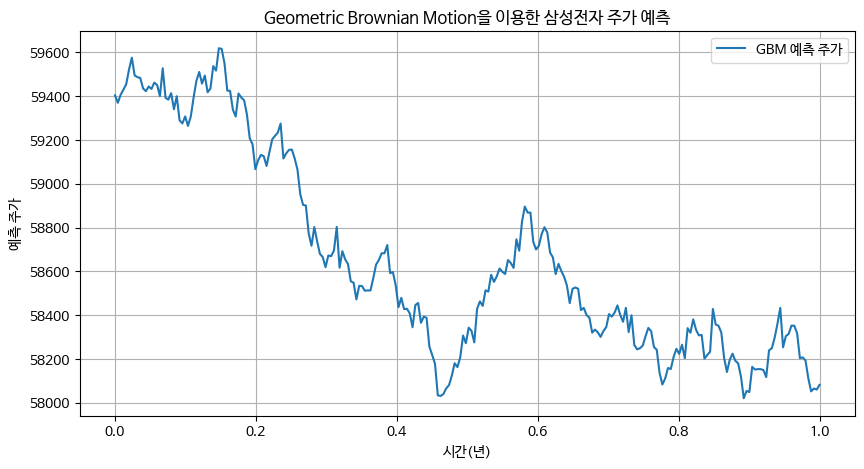

In [4]:
from pykrx import stock
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 삼성전자 주가 데이터
df = stock.get_market_ohlcv_by_date("2020-01-01", "2025-06-20", "005930")
df = df[['종가']].copy()
df.index = pd.to_datetime(df.index)
df = df.asfreq('B').fillna(method='ffill') #  결측값 없이 연속적인 "영업일 단위" 데이터

# 로그수익률 및 GBM 시뮬레이션
df['log_return'] = np.log(df['종가'] / df['종가'].shift(1)) # shift(1)은 하루 전 종가를 의미하며, np.log()는 자연로그를 계산
mu, sigma = df['log_return'].mean(), df['log_return'].std() #mu: 일간 로그수익률의 평균 → 수익의 기대값, sigma: 일간 로그수익률의 표준편차 → 변동성(Volatility)

# T = 1: 1년 (기간) 동안의 시뮬레이션
# N = 252: 영업일 기준 일 수 (주식 시장의 평균 연간 거래일)
# dt = 1/252: 1일 단위의 시간 간격
# S0: 현재 시점의 종가 (마지막 종가)
# 시뮬레이션의 시작 주가로 사용

# 시간 벡터 생성
# t = np.linspace(0, T, N)
# t: 0부터 1년까지 균등 간격의 시간 배열
# 길이 N → 시뮬레이션 주가 시계열의 시간 축

T, N, dt = 1, 252, 1/252
S0 = df['종가'].iloc[-1]
t = np.linspace(0, T, N)

# 브라운 운동 경로 생성
# W = np.cumsum(np.random.standard_normal(N)) * np.sqrt(dt)
# W: 브라운 운동 경로 (Wiener Process)
# 누적 표준 정규 분포 값을 √dt로 스케일링하여 생성
# np.random.standard_normal(N): 길이 N인 표준정규분포 샘플
#  GBM 방정식으로 주가 시뮬레이션
# S = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)

W = np.cumsum(np.random.standard_normal(N)) * np.sqrt(dt)
S = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)

# 시각화
plt.figure(figsize=(10, 5))
plt.plot(t, S, label='GBM 예측 주가')
plt.title('Geometric Brownian Motion을 이용한 삼성전자 주가 예측')
plt.xlabel('시간(년)')
plt.ylabel('예측 주가')
plt.grid(True)
plt.legend()
plt.show()
